# Importowanie Bibliotek
Import niezbędnych bibliotek: TensorFlow, Keras, NumPy, Pandas oraz bibliotek do przetwarzania danych.

Projekt wykorzystuje kluczowe biblioteki do budowy modelu regresji:
- TensorFlow/Keras – głównie do implementacji sieci neuronowych.
- NumPy i Pandas – do przetwarzania i manipulacji danymi.
- Scikit-learn – do normalizacji, podziału danych oraz oceny modelu.
- Matplotlib i Seaborn – do wizualizacji wyników.
- Keras Callbacks – do optymalizacji procesu uczenia.

In [26]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Przygotowanie Danych
Wczytanie i przygotowanie danych treningowych, normalizacja danych, podział na zbiór treningowy i testowy.

Załadowanie danych:
- Dane zaimportowano z pliku CSV, który zawiera parametry piwa (np. OG, FG, IBU) oraz etykiety (Color) do regresji.

Wybór kolumn numerycznych:
- Wybrane zostały istotne cechy: Size(L), OG, FG, IBU, ABV, BoilSize, BoilTime, BoilGravity, Efficiency.

Uzupełnianie braków:
- Brakujące wartości w danych zostały uzupełnione średnimi.

Normalizacja:
- Wszystkie kolumny zostały znormalizowane przy użyciu StandardScaler w celu poprawienia wydajności modelu.

Podział na zbiory:
- Dane podzielono na zbiór treningowy (80%) i testowy (20%).

In [27]:
dane = pd.read_csv('../data.csv')

kolumny_numeryczne = ['Size(L)', 'OG', 'FG', 'IBU', 'ABV', 'BoilSize', 'BoilTime', 'BoilGravity', 'Efficiency']
X = dane[kolumny_numeryczne].copy()

X = X.fillna(X.mean())

y = dane['Color'].copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Kształt danych treningowych:", X_train.shape)
print("Kształt danych testowych:", X_test.shape)
print("Kształt etykiet treningowych:", y_train.shape)
print("Kształt etykiet testowych:", y_test.shape)

Kształt danych treningowych: (59088, 9)
Kształt danych testowych: (14773, 9)
Kształt etykiet treningowych: (59088,)
Kształt etykiet testowych: (14773,)


# Utworzenie Modelu
Utworzenie modelu sieci neuronowej za pomocą Keras do regresji koloru piwa.

Model to wielowarstwowa sieć neuronowa z następującymi warstwami:
- Warstwy Dense – gęsto połączone warstwy aktywowane funkcją ReLU.
- Batch Normalization – stabilizuje i przyspiesza uczenie, redukując zmiany w rozkładach danych.
- Dropout – zapobiega przeuczeniu poprzez losowe wyłączanie neuronów.
- Warstwa wyjściowa – pojedynczy neuron do regresji, bez funkcji aktywacji.

Kompilacja modelu:
- Optymalizator: Adam (szybkość uczenia = 0.001).
- Mean Squared Error (MSE) jako funkcja straty.
- Mean Absolute Error (MAE) jako dodatkowa metryka.

In [28]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)), 
    BatchNormalization(),
    Dropout(0.5), 
    Dense(128, activation='relu'), 
    BatchNormalization(),
    Dropout(0.5), 
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5), 
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1) 
])

model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='mean_squared_error', 
              metrics=['mean_absolute_error']) 

model.summary() 

C:\Users\kubal\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 256)            │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,745 (186.50 KB)

 Trainable params: 46,785 (182.75 KB)

 Non-trainable params: 960 (3.75 KB)

# Trenowanie Modelu
Trenowanie modelu na danych treningowych z określoną liczbą epok i rozmiarem batcha.

Callbacki:
- EarlyStopping:
  - Monitoruje val_loss.
  - Zatrzymuje trening, gdy strata na walidacji nie poprawia się przez 10 epok.
  - Przywraca najlepsze wagi.
- ReduceLROnPlateau:
  - Zmniejsza współczynnik uczenia, gdy wyniki przestają się poprawiać.

Proces trenowania:
- Maksymalnie 100 epok, batch size = 16.
- Walidacja: 20% danych treningowych.
- Callbacki wspierają proces, optymalizując czas trenowania i zapobiegając przeuczeniu.

Wizualizacja:
- Wykres średniego błędu bezwzględnego
- Wykres straty

Epoch 1/100
2955/2955 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 205.4405 - mean_absolute_error: 10.0483 - val_loss: 125.6563 - val_mean_absolute_error: 8.5021 - learning_rate: 0.0010
Epoch 2/100
2955/2955 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 137.1773 - mean_absolute_error: 8.7274 - val_loss: 125.8373 - val_mean_absolute_error: 8.3988 - learning_rate: 0.0010
Epoch 3/100
2955/2955 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 136.2908 - mean_absolute_error: 8.7126 - val_loss: 125.7349 - val_mean_absolute_error: 8.2431 - learning_rate: 0.0010
Epoch 4/100
2955/2955 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 132.5222 - mean_absolute_error: 8.6087 - val_loss: 120.9558 - val_mean_absolute_error: 8.2683 - learning_rate: 0.0010
Epoch 5/100
2955/2955 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 130.6600 - mean_absolute_error: 8.4960 - val_loss: 116.6722 - val_mean_absolute_error: 8.2757 - learning_rate: 0.0010
Epoch 6/100
2955/2955 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 123.6399 - mean_absolute_er

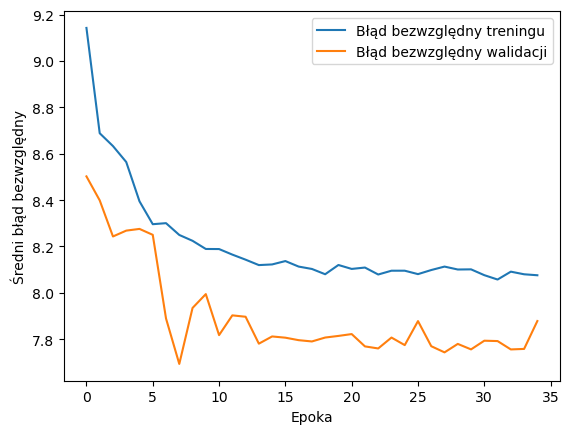

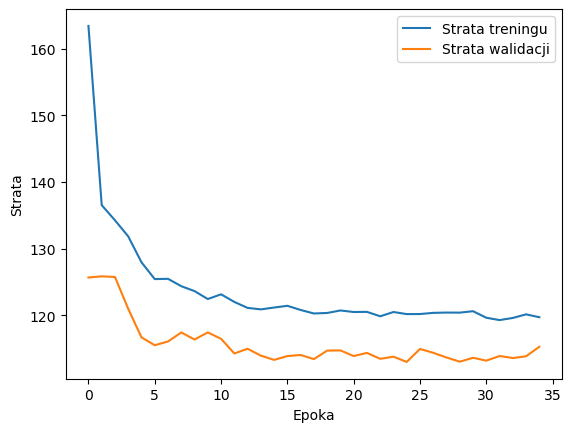

In [29]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

history = model.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=16, 
                    validation_split=0.2, 
                    callbacks=[early_stopping, reduce_lr])

plt.plot(history.history['mean_absolute_error'], label='Błąd bezwzględny treningu')
plt.plot(history.history['val_mean_absolute_error'], label='Błąd bezwzględny walidacji')
plt.xlabel('Epoka')
plt.ylabel('Średni błąd bezwzględny')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Strata treningu')
plt.plot(history.history['val_loss'], label='Strata walidacji')
plt.xlabel('Epoka')
plt.ylabel('Strata')
plt.legend()
plt.show()

# Testowanie i Ewaluacja
Ocena modelu na zbiorze testowym, obliczenie średniego błędu kwadratowego, wykres porównujący rzeczywiste i przewidywane wartości.

Ocena modelu:
- Testowa strata (loss) i średni błąd bezwzględny (MAE) obliczane są na zbiorze testowym za pomocą model.evaluate.

Predykcja:
- model.predict generuje przewidywane wartości koloru piwa dla zbioru testowego.
- Średni błąd kwadratowy (MSE), obliczony za pomocą mean_squared_error, mierzy średnią różnicę między wartościami rzeczywistymi a przewidywanymi

Wizualizacja:
- Wykres rzeczywistych vs przewidywanych wartości przedstawia:
  - Punkty reprezentujące przewidywania modelu w odniesieniu do wartości rzeczywistych.
  - Linia przerywana to idealne dopasowanie (gdzie wartości rzeczywiste i przewidywane są równe).
Rozrzut punktów wokół tej linii wskazuje na jakość predykcji modelu.

462/462 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 118.9619 - mean_absolute_error: 7.9657
Testowa Strata: 117.93485260009766
Testowy Średni Błąd Bezwzględny: 7.954965114593506
462/462 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Średni Błąd Kwadratowy: 117.93486308723874


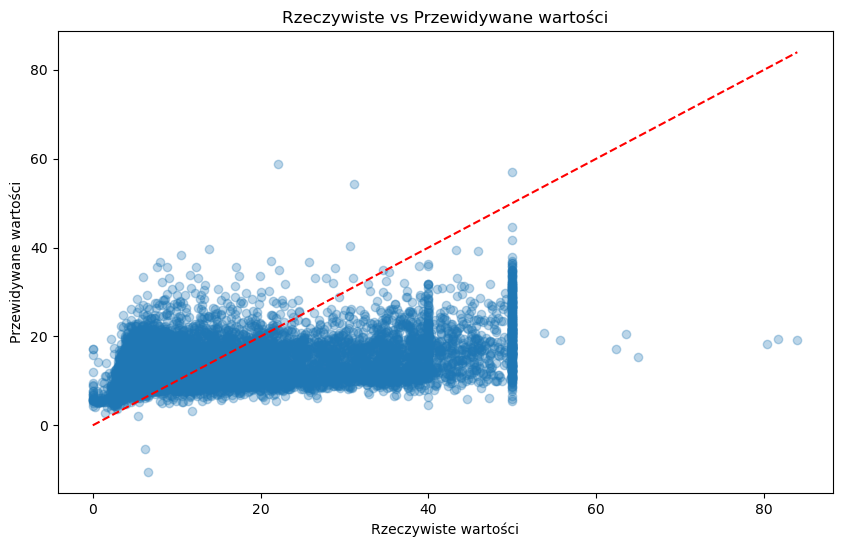

In [30]:
test_loss, test_mae = model.evaluate(X_test, y_test)

print(f'Testowa Strata: {test_loss}')
print(f'Testowy Średni Błąd Bezwzględny: {test_mae}')

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Średni Błąd Kwadratowy: {mse}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Rzeczywiste wartości')
plt.ylabel('Przewidywane wartości')
plt.title('Rzeczywiste vs Przewidywane wartości')
plt.show()

# Zapisywanie Modelu
Zapisanie wytrenowanego modelu do pliku dla późniejszego wykorzystania, wczytanie modelu z pliku i ocena jego działania.

Zapisywanie modelu:
- Wytrenowany model jest zapisywany w formacie .h5 za pomocą model.save.

Wczytywanie modelu:
- Model zapisany w pliku jest wczytywany za pomocą keras.models.load_model.

Ocena wczytanego modelu:
- Model jest ponownie oceniany na zbiorze testowym przy użyciu model.evaluate

In [31]:
model.save('../models/model_regresji_koloru_piwa.h5')

wczytany_model = keras.models.load_model('../models/model_regresji_koloru_piwa.h5')

wczytany_model.summary()

wczytany_test_loss, wczytany_test_mae = wczytany_model.evaluate(X_test, y_test)

print(f'Wczytana Testowa Strata: {wczytany_test_loss}')
print(f'Wczytany Testowy Średni Błąd Bezwzględny: {wczytany_test_mae}')

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 256)            │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,747 (186.52 KB)

 Trainable params: 46,785 (182.75 KB)

 Non-trainable params: 960 (3.75 KB)

 Optimizer params: 2 (12.00 B)

462/462 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 118.9619 - mean_absolute_error: 7.9657
Wczytana Testowa Strata: 117.93485260009766
Wczytany Testowy Średni Błąd Bezwzględny: 7.954965114593506


# Przewidywanie Koloru Piwa
Przewidywanie koloru piwa dla różnych stylów piwa na podstawie wytrenowanego modelu.

Wczytanie modelu:
- Model wczytany z pliku .h5 jest używany do przewidywania koloru piwa.

Przygotowanie danych:
- Dopasowanie skalera: Na podstawie danych treningowych normalizator (StandardScaler) jest dopasowywany do danych wejściowych, aby zapewnić zgodność ze skalowaniem użytym podczas trenowania modelu.

Funkcja przewiduj_kolor_piwa:
- Przyjmuje dane wejściowe dla piwa w postaci słownika.
- Dane są przekształcane na format DataFrame, normalizowane i przekazywane do modelu w celu przewidywania koloru.

In [32]:
model = keras.models.load_model('../models/model_regresji_koloru_piwa.h5')

dane_treningowe = pd.read_csv('../data.csv')

kolumny_numeryczne = ['Size(L)', 'OG', 'FG', 'IBU', 'ABV', 'BoilSize', 'BoilTime', 'BoilGravity', 'Efficiency']
dane_treningowe = dane_treningowe[kolumny_numeryczne]

dane_treningowe = dane_treningowe.fillna(dane_treningowe.mean())

scaler = StandardScaler()
scaler.fit(dane_treningowe)

def przewiduj_kolor_piwa(dane_piwa):
    df = pd.DataFrame([dane_piwa])
    
    df_scaled = scaler.transform(df)
    
    predykcja = model.predict(df_scaled)
    
    return predykcja[0][0]

piwa = {
    'IPA': {'Size(L)': 20.0, 'OG': 1.065, 'FG': 1.015, 'IBU': 60, 'ABV': 6.5, 'BoilSize': 25.0, 'BoilTime': 60, 'BoilGravity': 1.060, 'Efficiency': 75},
    'Stout': {'Size(L)': 20.0, 'OG': 1.075, 'FG': 1.020, 'IBU': 40, 'ABV': 7.0, 'BoilSize': 25.0, 'BoilTime': 60, 'BoilGravity': 1.070, 'Efficiency': 75},
    'Pilsner': {'Size(L)': 20.0, 'OG': 1.050, 'FG': 1.010, 'IBU': 30, 'ABV': 5.0, 'BoilSize': 25.0, 'BoilTime': 60, 'BoilGravity': 1.045, 'Efficiency': 75},
    'Wheat': {'Size(L)': 20.0, 'OG': 1.055, 'FG': 1.012, 'IBU': 20, 'ABV': 5.5, 'BoilSize': 25.0, 'BoilTime': 60, 'BoilGravity': 1.050, 'Efficiency': 75},
    'APA': {'Size(L)': 20.0, 'OG': 1.050, 'FG': 1.010, 'IBU': 35, 'ABV': 5.5, 'BoilSize': 25.0, 'BoilTime': 60, 'BoilGravity': 1.045, 'Efficiency': 75},
    'Barleywine': {'Size(L)': 20.0, 'OG': 1.100, 'FG': 1.025, 'IBU': 80, 'ABV': 10.0, 'BoilSize': 25.0, 'BoilTime': 90, 'BoilGravity': 1.095, 'Efficiency': 75},
    'Saison': {'Size(L)': 20.0, 'OG': 1.060, 'FG': 1.008, 'IBU': 25, 'ABV': 6.0, 'BoilSize': 25.0, 'BoilTime': 60, 'BoilGravity': 1.055, 'Efficiency': 75},
    'Porter': {'Size(L)': 20.0, 'OG': 1.065, 'FG': 1.018, 'IBU': 35, 'ABV': 6.5, 'BoilSize': 25.0, 'BoilTime': 60, 'BoilGravity': 1.060, 'Efficiency': 75}
}

for styl, dane_piwa in piwa.items():
    kolor_piwa = przewiduj_kolor_piwa(dane_piwa)
    print(f'Styl: {styl}, Przewidywany kolor piwa: {kolor_piwa:.2f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
Styl: IPA, Przewidywany kolor piwa: 12.68
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Styl: Stout, Przewidywany kolor piwa: 20.09
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Styl: Pilsner, Przewidywany kolor piwa: 9.72
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Styl: Wheat, Przewidywany kolor piwa: 10.01
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Styl: APA, Przewidywany kolor piwa: 10.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Styl: Barleywine, Przewidywany kolor piwa: 26.60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Styl: Saison, Przewidywany kolor piwa: 9.46
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Styl: Porter, Przewidywany kolor piwa: 18.72
